#Importing Necessary Libraries

In [ ]:
import tensorflow.keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import plot_model

#Mounting Google Drive and Loading Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -q "drive/My Drive/Small_set_cats_vs_dogs.zip"

#Hyper-Parameters Initialization

In [ ]:
epochs = 100
batch_size = 32
training_samples = 4000
validation_samples = 600
img_width = 224
img_height = 224
channels = 3
input_shape = (img_width,img_height,3)

#Data Preparation

In [ ]:
train_data_dir = "Small_set_cats_vs_dogs/train"
validation_data_dir = "Small_set_cats_vs_dogs/val"
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    shear_range = 0.4,
    zoom_range = 0.4,
    rotation_range = 20,
    width_shift_range = 0.4,
    height_shift_range = 0.4,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = "nearest"
)

val_datagen = ImageDataGenerator(rescale = 1./255)
print("Training Images ...")
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = "binary"
)

print("Validation Images ...")
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = "binary"
)

Training Images ...
Found 4000 images belonging to 2 classes.
Validation Images ...
Found 600 images belonging to 2 classes.


#Network Setup

##VGG11 Architecture

In [ ]:
def create_model():
    model = Sequential(name='VGG11Lite')
    model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',name='1.Conv3-64',input_shape=input_shape))
    model.add(Activation('relu',name='ReLU1'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool1'))

    model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding='same',name='2.Conv3-128'))
    model.add(Activation('relu',name='ReLU2'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool2'))

    model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding='same',name='3.Conv3-256'))
    model.add(Activation('relu',name='ReLU3'))
    model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding='same',name='4.Conv3-256'))
    model.add(Activation('relu',name='ReLU4'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool3'))

    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='5.Conv3-512'))
    model.add(Activation('relu',name='ReLU5'))
    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='6.Conv3-512'))
    model.add(Activation('relu',name='ReLU6'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool4'))

    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='7.Conv3-512'))
    model.add(Activation('relu',name='ReLU7'))
    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='8.Conv3-512'))
    model.add(Activation('relu',name='ReLU8'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool5'))

    model.add(Flatten(name='Flatten'))
    model.add(Dense(4096,name='9.FC-4096'))
    model.add(Activation('relu',name='ReLU9'))
    model.add(Dense(4096,name='10.FC-4096'))
    model.add(Activation('relu',name='ReLU10'))
    model.add(Dense(1,name='11.FC-1'))
    model.add(Activation('sigmoid',name='Sigmoid'))
    model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])
    
    return model
model = create_model()

##VGG19

In [ ]:
def create_model():
    model = Sequential(name='VGG19Lite')
    model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',name='1.Conv3-64',input_shape=input_shape))
    model.add(Activation('relu',name='ReLU1'))
    model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',name='2.Conv3-64',input_shape=input_shape))
    model.add(Activation('relu',name='ReLU2'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool1'))

    model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding='same',name='3.Conv3-128'))
    model.add(Activation('relu',name='ReLU3'))
    model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding='same',name='4.Conv3-128'))
    model.add(Activation('relu',name='ReLU4'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool2'))

    model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding='same',name='5.Conv3-256'))
    model.add(Activation('relu',name='ReLU5'))
    model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding='same',name='6.Conv3-256'))
    model.add(Activation('relu',name='ReLU6'))
    model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding='same',name='7.Conv3-256'))
    model.add(Activation('relu',name='ReLU7'))
    model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding='same',name='8.Conv3-256'))
    model.add(Activation('relu',name='ReLU8'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool3'))

    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='9.Conv3-512'))
    model.add(Activation('relu',name='ReLU9'))
    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='10.Conv3-512'))
    model.add(Activation('relu',name='ReLU10'))
    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='11.Conv3-512'))
    model.add(Activation('relu',name='ReLU11'))
    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='12.Conv3-512'))
    model.add(Activation('relu',name='ReLU12'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool4'))

    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='13.Conv3-512'))
    model.add(Activation('relu',name='ReLU13'))
    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='14.Conv3-512'))
    model.add(Activation('relu',name='ReLU14'))
    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='15.Conv3-512'))
    model.add(Activation('relu',name='ReLU15'))
    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='16.Conv3-512'))
    model.add(Activation('relu',name='ReLU16'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool5'))

    model.add(Flatten(name='Flatten'))
    model.add(Dense(4096,name='17.FC-4096'))
    model.add(Activation('relu',name='ReLU17'))
    model.add(Dense(4096,name='18.FC-4096'))
    model.add(Activation('relu',name='ReLU18'))
    model.add(Dense(1,name='19.FC-1'))
    model.add(Activation('sigmoid',name='Sigmoid'))
    model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])
    
    return model
model = create_model()

##VGG16

In [ ]:
def create_model():
    model = Sequential(name='VGG16Lite')
    model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',name='1.Conv3-64',input_shape=input_shape))
    model.add(Activation('relu',name='ReLU1'))
    model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',name='2.Conv3-64',input_shape=input_shape))
    model.add(Activation('relu',name='ReLU2'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool1'))

    model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding='same',name='3.Conv3-128'))
    model.add(Activation('relu',name='ReLU3'))
    model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding='same',name='4.Conv3-128'))
    model.add(Activation('relu',name='ReLU4'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool2'))

    model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding='same',name='5.Conv3-256'))
    model.add(Activation('relu',name='ReLU5'))
    model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding='same',name='6.Conv3-256'))
    model.add(Activation('relu',name='ReLU6'))
    model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding='same',name='7.Conv3-256'))
    model.add(Activation('relu',name='ReLU7'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool3'))

    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='8.Conv3-512'))
    model.add(Activation('relu',name='ReLU8'))
    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='9.Conv3-512'))
    model.add(Activation('relu',name='ReLU9'))
    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='10.Conv3-512'))
    model.add(Activation('relu',name='ReLU10'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool4'))

    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='11.Conv3-512'))
    model.add(Activation('relu',name='ReLU11'))
    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='12.Conv3-512'))
    model.add(Activation('relu',name='ReLU12'))
    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='13.Conv3-512'))
    model.add(Activation('relu',name='ReLU13'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool5'))

    model.add(Flatten(name='Flatten'))
    model.add(Dense(4096,name='14.FC-4096'))
    model.add(Activation('relu',name='ReLU14'))
    model.add(Dense(4096,name='15.FC-4096'))
    model.add(Activation('relu',name='ReLU15'))
    model.add(Dense(1,name='16.FC-1'))
    model.add(Activation('sigmoid',name='Sigmoid'))
    model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])
    
    return model
model = create_model()

##VGG9

In [ ]:
def create_model():
    model = Sequential(name='VGG9Lite')
    model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',name='1.Conv3-64',input_shape=input_shape))
    model.add(Activation('relu',name='ReLU1'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool1'))

    model.add(Conv2D(filters=128,kernel_size=3,strides=1,padding='same',name='2.Conv3-128'))
    model.add(Activation('relu',name='ReLU2'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool2'))

    model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding='same',name='3.Conv3-256'))
    model.add(Activation('relu',name='ReLU3'))
    model.add(Conv2D(filters=256,kernel_size=3,strides=1,padding='same',name='4.Conv3-256'))
    model.add(Activation('relu',name='ReLU4'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool3'))

    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='5.Conv3-512'))
    model.add(Activation('relu',name='ReLU5'))
    model.add(Conv2D(filters=512,kernel_size=3,strides=1,padding='same',name='6.Conv3-512'))
    model.add(Activation('relu',name='ReLU6'))
    model.add(MaxPooling2D(pool_size=2,strides=2,name='MaxPool4'))

    model.add(Flatten(name='Flatten'))
    model.add(Dense(4096,name='7.FC-4096'))
    model.add(Activation('relu',name='ReLU7'))
    model.add(Dense(4096,name='8.FC-4096'))
    model.add(Activation('relu',name='ReLU8'))
    model.add(Dense(1,name='9.FC-1'))
    model.add(Activation('sigmoid',name='Sigmoid'))
    model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])
    
    return model
model = create_model()

NameError: ignored

##Model Summary

In [ ]:
model.summary()

Model: "VGG9Litev2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1.Conv3-64 (Conv2D)         (None, 224, 224, 64)      1792      
                                                                 
 ReLU1 (Activation)          (None, 224, 224, 64)      0         
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 112, 112, 64)      0         
                                                                 
 2.Conv3-128 (Conv2D)        (None, 112, 112, 128)     73856     
                                                                 
 ReLU2 (Activation)          (None, 112, 112, 128)     0         
                                                                 
 MaxPool2 (MaxPooling2D)     (None, 56, 56, 128)       0         
                                                                 
 3.Conv3-256 (Conv2D)        (None, 56, 56, 256)       2

##Callbacks

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

snapshot_name = 'VGG11Lite'
checkpoint = ModelCheckpoint(filepath=snapshot_name+".{epoch:02d}-{val_accuracy:.2f}.hdf5", monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')

#Training and Validation

##w/ Callback

In [ ]:
history = model.fit(train_generator, 
    steps_per_epoch = training_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = validation_samples // batch_size,
    callbacks=[reduce_lr,checkpoint]) 

model.save_weights('VGG9Lite_v1_saved.h5')

##w/o Callback

In [ ]:
history = model.fit(train_generator, 
    steps_per_epoch = training_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = validation_samples // batch_size)

model.save_weights('VGG9Lite_v1_saved.h5')

## VGG9-Lite 100 epochs
Epoch 1/100
125/125 [==============================] - 75s 489ms/step - loss: 0.6929 - accuracy: 0.4997 - val_loss: 0.6924 - val_accuracy: 0.5677

Epoch 2/100
125/125 [==============================] - 61s 490ms/step - loss: 0.6921 - accuracy: 0.5303 - val_loss: 0.6919 - val_accuracy: 0.4948

Epoch 3/100
125/125 [==============================] - 62s 496ms/step - loss: 0.6909 - accuracy: 0.5230 - val_loss: 0.6910 - val_accuracy: 0.5347

Epoch 4/100
125/125 [==============================] - 62s 496ms/step - loss: 0.6907 - accuracy: 0.5480 - val_loss: 0.6890 - val_accuracy: 0.5434

Epoch 5/100
125/125 [==============================] - 62s 495ms/step - loss: 0.6894 - accuracy: 0.5552 - val_loss: 0.6910 - val_accuracy: 0.5017

Epoch 6/100
125/125 [==============================] - 62s 495ms/step - loss: 0.6878 - accuracy: 0.5508 - val_loss: 0.6883 - val_accuracy: 0.5017

Epoch 7/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6850 - accuracy: 0.5633 - val_loss: 0.6815 - val_accuracy: 0.5712

Epoch 8/100
125/125 [==============================] - 62s 497ms/step - loss: 0.6834 - accuracy: 0.5587 - val_loss: 0.6888 - val_accuracy: 0.4965

Epoch 9/100
125/125 [==============================] - 62s 495ms/step - loss: 0.6794 - accuracy: 0.5698 - val_loss: 0.6842 - val_accuracy: 0.5260

Epoch 10/100
125/125 [==============================] - 62s 498ms/step - loss: 0.6790 - accuracy: 0.5623 - val_loss: 0.6829 - val_accuracy: 0.5538

Epoch 11/100
125/125 [==============================] - 62s 497ms/step - loss: 0.6771 - accuracy: 0.5715 - val_loss: 0.6670 - val_accuracy: 0.5764

Epoch 12/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6728 - accuracy: 0.5790 - val_loss: 0.6938 - val_accuracy: 0.5295

Epoch 13/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6744 - accuracy: 0.5695 - val_loss: 0.6824 - val_accuracy: 0.5469

Epoch 14/100
125/125 [==============================] - 62s 496ms/step - loss: 0.6688 - accuracy: 0.5803 - val_loss: 0.6631 - val_accuracy: 0.5903

Epoch 15/100
125/125 [==============================] - 62s 492ms/step - loss: 0.6699 - accuracy: 0.5822 - val_loss: 0.6650 - val_accuracy: 0.6128

Epoch 16/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6650 - accuracy: 0.5880 - val_loss: 0.6617 - val_accuracy: 0.6163

Epoch 17/100
125/125 [==============================] - 62s 495ms/step - loss: 0.6631 - accuracy: 0.5915 - val_loss: 0.7176 - val_accuracy: 0.5052

Epoch 18/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6602 - accuracy: 0.5943 - val_loss: 0.6603 - val_accuracy: 0.6181

Epoch 19/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6610 - accuracy: 0.5978 - val_loss: 0.6603 - val_accuracy: 0.6007

Epoch 20/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6583 - accuracy: 0.5943 - val_loss: 0.6772 - val_accuracy: 0.5885

Epoch 21/100
125/125 [==============================] - 62s 492ms/step - loss: 0.6653 - accuracy: 0.5840 - val_loss: 0.6802 - val_accuracy: 0.5816

Epoch 22/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6588 - accuracy: 0.5872 - val_loss: 0.6754 - val_accuracy: 0.5521

Epoch 23/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6560 - accuracy: 0.5962 - val_loss: 0.6725 - val_accuracy: 0.5677

Epoch 24/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6564 - accuracy: 0.5955 - val_loss: 0.6652 - val_accuracy: 0.6076

Epoch 25/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6560 - accuracy: 0.5940 - val_loss: 0.6510 - val_accuracy: 0.6181

Epoch 26/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6544 - accuracy: 0.5930 - val_loss: 0.6664 - val_accuracy: 0.5781

Epoch 27/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6533 - accuracy: 0.5982 - val_loss: 0.6706 - val_accuracy: 0.5833

Epoch 28/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6528 - accuracy: 0.5997 - val_loss: 0.6481 - val_accuracy: 0.6302

Epoch 29/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6532 - accuracy: 0.6045 - val_loss: 0.6525 - val_accuracy: 0.6285

Epoch 30/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6528 - accuracy: 0.6055 - val_loss: 0.6458 - val_accuracy: 0.6250

Epoch 31/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6524 - accuracy: 0.6058 - val_loss: 0.6505 - val_accuracy: 0.6007

Epoch 32/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6494 - accuracy: 0.6055 - val_loss: 0.6535 - val_accuracy: 0.5955

Epoch 33/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6503 - accuracy: 0.6015 - val_loss: 0.6468 - val_accuracy: 0.6215

Epoch 34/100
125/125 [==============================] - 62s 495ms/step - loss: 0.6500 - accuracy: 0.6165 - val_loss: 0.6489 - val_accuracy: 0.5955

Epoch 35/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6409 - accuracy: 0.6097 - val_loss: 0.7142 - val_accuracy: 0.5226

Epoch 36/100
125/125 [==============================] - 62s 495ms/step - loss: 0.6440 - accuracy: 0.6140 - val_loss: 0.6398 - val_accuracy: 0.6285

Epoch 37/100
125/125 [==============================] - 62s 492ms/step - loss: 0.6454 - accuracy: 0.6160 - val_loss: 0.8193 - val_accuracy: 0.5122

Epoch 38/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6434 - accuracy: 0.6152 - val_loss: 0.6482 - val_accuracy: 0.6181

Epoch 39/100
125/125 [==============================] - 62s 492ms/step - loss: 0.6403 - accuracy: 0.6175 - val_loss: 0.6298 - val_accuracy: 0.6580

Epoch 40/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6448 - accuracy: 0.6183 - val_loss: 0.6380 - val_accuracy: 0.6233

Epoch 41/100
125/125 [==============================] - 62s 492ms/step - loss: 0.6378 - accuracy: 0.6280 - val_loss: 0.6436 - val_accuracy: 0.6163

Epoch 42/100
125/125 [==============================] - 62s 492ms/step - loss: 0.6382 - accuracy: 0.6180 - val_loss: 0.6805 - val_accuracy: 0.5781

Epoch 43/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6351 - accuracy: 0.6273 - val_loss: 0.6333 - val_accuracy: 0.6285

Epoch 44/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6324 - accuracy: 0.6335 - val_loss: 0.6237 - val_accuracy: 0.6545

Epoch 45/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6395 - accuracy: 0.6202 - val_loss: 0.6532 - val_accuracy: 0.5903

Epoch 46/100
125/125 [==============================] - 62s 496ms/step - loss: 0.6358 - accuracy: 0.6225 - val_loss: 0.6261 - val_accuracy: 0.6632

Epoch 47/100
125/125 [==============================] - 62s 496ms/step - loss: 0.6375 - accuracy: 0.6288 - val_loss: 0.6258 - val_accuracy: 0.6458

Epoch 48/100
125/125 [==============================] - 62s 496ms/step - loss: 0.6264 - accuracy: 0.6363 - val_loss: 0.6573 - val_accuracy: 0.6059

Epoch 49/100
125/125 [==============================] - 62s 495ms/step - loss: 0.6279 - accuracy: 0.6417 - val_loss: 0.6150 - val_accuracy: 0.6684

Epoch 50/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6276 - accuracy: 0.6410 - val_loss: 0.6141 - val_accuracy: 0.6510

Epoch 51/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6225 - accuracy: 0.6425 - val_loss: 0.6199 - val_accuracy: 0.6580

Epoch 52/100
125/125 [==============================] - 62s 495ms/step - loss: 0.6270 - accuracy: 0.6390 - val_loss: 0.6113 - val_accuracy: 0.6892

Epoch 53/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6262 - accuracy: 0.6447 - val_loss: 0.6423 - val_accuracy: 0.6076

Epoch 54/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6195 - accuracy: 0.6513 - val_loss: 0.6153 - val_accuracy: 0.6719

Epoch 55/100
125/125 [==============================] - 62s 492ms/step - loss: 0.6251 - accuracy: 0.6423 - val_loss: 0.6126 - val_accuracy: 0.6562

Epoch 56/100
125/125 [==============================] - 62s 491ms/step - loss: 0.6211 - accuracy: 0.6440 - val_loss: 0.6058 - val_accuracy: 0.6962

Epoch 57/100
125/125 [==============================] - 62s 493ms/step - loss: 0.6190 - accuracy: 0.6485 - val_loss: 0.6105 - val_accuracy: 0.6562

Epoch 58/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6140 - accuracy: 0.6515 - val_loss: 0.6147 - val_accuracy: 0.6719

Epoch 59/100
125/125 [==============================] - 63s 502ms/step - loss: 0.6212 - accuracy: 0.6495 - val_loss: 0.6789 - val_accuracy: 0.5781

Epoch 60/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6119 - accuracy: 0.6538 - val_loss: 0.5869 - val_accuracy: 0.6892

Epoch 61/100
125/125 [==============================] - 61s 490ms/step - loss: 0.6091 - accuracy: 0.6605 - val_loss: 0.5875 - val_accuracy: 0.6979

Epoch 62/100
125/125 [==============================] - 62s 496ms/step - loss: 0.6103 - accuracy: 0.6570 - val_loss: 0.6452 - val_accuracy: 0.6146

Epoch 63/100
125/125 [==============================] - 63s 500ms/step - loss: 0.6044 - accuracy: 0.6695 - val_loss: 0.5748 - val_accuracy: 0.7066

Epoch 64/100
125/125 [==============================] - 63s 505ms/step - loss: 0.6070 - accuracy: 0.6633 - val_loss: 0.6010 - val_accuracy: 0.6615

Epoch 65/100
125/125 [==============================] - 63s 499ms/step - loss: 0.6077 - accuracy: 0.6668 - val_loss: 0.6065 - val_accuracy: 0.6510

Epoch 66/100
125/125 [==============================] - 63s 499ms/step - loss: 0.6067 - accuracy: 0.6697 - val_loss: 0.5697 - val_accuracy: 0.7240

Epoch 67/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6009 - accuracy: 0.6695 - val_loss: 0.5802 - val_accuracy: 0.6979

Epoch 68/100
125/125 [==============================] - 62s 492ms/step - loss: 0.6052 - accuracy: 0.6727 - val_loss: 0.5584 - val_accuracy: 0.7205

Epoch 69/100
125/125 [==============================] - 62s 493ms/step - loss: 0.5980 - accuracy: 0.6758 - val_loss: 0.5828 - val_accuracy: 0.6927

Epoch 70/100
125/125 [==============================] - 62s 494ms/step - loss: 0.6073 - accuracy: 0.6628 - val_loss: 0.5711 - val_accuracy: 0.6771

Epoch 71/100
125/125 [==============================] - 62s 492ms/step - loss: 0.5938 - accuracy: 0.6737 - val_loss: 0.5563 - val_accuracy: 0.7135

Epoch 72/100
125/125 [==============================] - 62s 496ms/step - loss: 0.5977 - accuracy: 0.6702 - val_loss: 0.5627 - val_accuracy: 0.7448

Epoch 73/100
125/125 [==============================] - 62s 491ms/step - loss: 0.5926 - accuracy: 0.6785 - val_loss: 0.5565 - val_accuracy: 0.7205

Epoch 74/100
125/125 [==============================] - 62s 492ms/step - loss: 0.5979 - accuracy: 0.6700 - val_loss: 0.5485 - val_accuracy: 0.7344

Epoch 75/100
125/125 [==============================] - 61s 489ms/step - loss: 0.5896 - accuracy: 0.6825 - val_loss: 0.5689 - val_accuracy: 0.7222

Epoch 76/100
125/125 [==============================] - 61s 489ms/step - loss: 0.5851 - accuracy: 0.6858 - val_loss: 0.5415 - val_accuracy: 0.7326

Epoch 77/100
125/125 [==============================] - 61s 490ms/step - loss: 0.5908 - accuracy: 0.6845 - val_loss: 0.5546 - val_accuracy: 0.7222

Epoch 78/100
125/125 [==============================] - 61s 489ms/step - loss: 0.5908 - accuracy: 0.6840 - val_loss: 0.5485 - val_accuracy: 0.7205

Epoch 79/100
125/125 [==============================] - 62s 496ms/step - loss: 0.5967 - accuracy: 0.6760 - val_loss: 0.5427 - val_accuracy: 0.7448

Epoch 80/100
125/125 [==============================] - 62s 492ms/step - loss: 0.5844 - accuracy: 0.6810 - val_loss: 0.5521 - val_accuracy: 0.7344

Epoch 81/100
125/125 [==============================] - 61s 491ms/step - loss: 0.5862 - accuracy: 0.6860 - val_loss: 0.6398 - val_accuracy: 0.6476

Epoch 82/100
125/125 [==============================] - 61s 489ms/step - loss: 0.5836 - accuracy: 0.6883 - val_loss: 0.5415 - val_accuracy: 0.7500

Epoch 83/100
125/125 [==============================] - 61s 491ms/step - loss: 0.5794 - accuracy: 0.6913 - val_loss: 0.5396 - val_accuracy: 0.7326

Epoch 84/100
125/125 [==============================] - 61s 489ms/step - loss: 0.5822 - accuracy: 0.6935 - val_loss: 0.5427 - val_accuracy: 0.7170

Epoch 85/100
125/125 [==============================] - 62s 492ms/step - loss: 0.5834 - accuracy: 0.6910 - val_loss: 0.6016 - val_accuracy: 0.6632

Epoch 86/100
125/125 [==============================] - 62s 492ms/step - loss: 0.5764 - accuracy: 0.6967 - val_loss: 0.5430 - val_accuracy: 0.7257

Epoch 87/100
125/125 [==============================] - 62s 492ms/step - loss: 0.5787 - accuracy: 0.6930 - val_loss: 0.5846 - val_accuracy: 0.6944

Epoch 88/100
125/125 [==============================] - 62s 492ms/step - loss: 0.5826 - accuracy: 0.6875 - val_loss: 0.6936 - val_accuracy: 0.6024

Epoch 89/100
125/125 [==============================] - 62s 496ms/step - loss: 0.5810 - accuracy: 0.6885 - val_loss: 0.5348 - val_accuracy: 0.7257

Epoch 90/100
125/125 [==============================] - 62s 491ms/step - loss: 0.5800 - accuracy: 0.6865 - val_loss: 0.5217 - val_accuracy: 0.7361

Epoch 91/100
125/125 [==============================] - 62s 494ms/step - loss: 0.5733 - accuracy: 0.7015 - val_loss: 0.5327 - val_accuracy: 0.7552

Epoch 92/100
125/125 [==============================] - 62s 494ms/step - loss: 0.5792 - accuracy: 0.6960 - val_loss: 0.5317 - val_accuracy: 0.7465

Epoch 93/100
125/125 [==============================] - 62s 492ms/step - loss: 0.5611 - accuracy: 0.7085 - val_loss: 0.5550 - val_accuracy: 0.7118

Epoch 94/100
125/125 [==============================] - 61s 489ms/step - loss: 0.5700 - accuracy: 0.6998 - val_loss: 0.5249 - val_accuracy: 0.7378

Epoch 95/100
125/125 [==============================] - 61s 489ms/step - loss: 0.5682 - accuracy: 0.7135 - val_loss: 0.5138 - val_accuracy: 0.7535

Epoch 96/100
125/125 [==============================] - 62s 493ms/step - loss: 0.5697 - accuracy: 0.7032 - val_loss: 0.5614 - val_accuracy: 0.7257

Epoch 97/100
125/125 [==============================] - 62s 495ms/step - loss: 0.5739 - accuracy: 0.6927 - val_loss: 0.5445 - val_accuracy: 0.7031

Epoch 98/100
125/125 [==============================] - 62s 493ms/step - loss: 0.5684 - accuracy: 0.7053 - val_loss: 0.5120 - val_accuracy: 0.7587

Epoch 99/100
125/125 [==============================] - 61s 491ms/step - loss: 0.5653 - accuracy: 0.7048 - val_loss: 0.5539 - val_accuracy: 0.7066

Epoch 100/100
125/125 [==============================] - 61s 490ms/step - loss: 0.5628 - accuracy: 0.7045 - val_loss: 0.5263 - val_accuracy: 0.7378

#Evaluating Test Data

In [ ]:
test_data_dir = 'Small_set_cats_vs_dogs/test'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 200 images belonging to 2 classes.


In [ ]:
model.evaluate_generator(test_generator, verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


7/7 - 2s - loss: 0.6031 - accuracy: 0.6750 - 2s/epoch - 241ms/step


[0.6031345129013062, 0.675000011920929]

## Test evaluation on VGG9-Lite 100 epochs
7/7 - 2s - loss: 0.6031 - accuracy: 0.6750 - 2s/epoch - 241ms/step


#Plot Loss and Accuracy

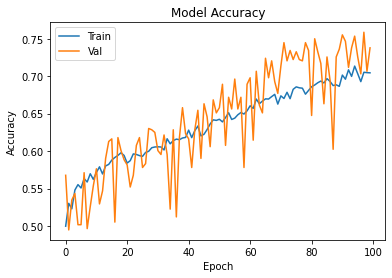

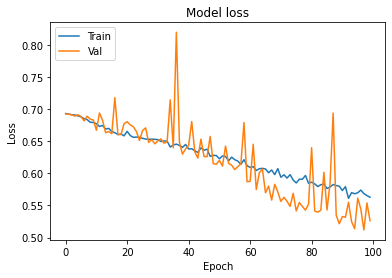

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.savefig('VGG9-Lite_v2_acc.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.savefig('VGG9-Lite_v2_loss.png')
plt.show()